# In this project I will load the fahion_Mnist data to train the neural network to predict the label (numerical label) of the given image (e.g. shirt, shoe, trousers etc).

### Import the libraries

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Load the fashion_mnist dataset and get the array of train and test images with associated labels.

In [65]:
f_mnist = keras.datasets.fashion_mnist
(train_image, train_label), (test_image, test_label) = f_mnist.load_data()

### Print and see one of the images

Label: 1
Numerical Image: [[  0   0   0   0   0   0   0   0   0  53 146 127 115 111 130 129 100 147 169 190   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 117 190 188 221 234 254 236 221 205 186 222   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 156 175 193 195 195 202 203 187 168 228  32   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 165 186 198 209 219 198 205 211 201 189 233  94   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 199 210 225 207 201 207 221 210 208 236 111   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 200 175 172 215 224 216 216 223 210 198 237 152   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7 213 156 151 171 187 215 227 212 200 178 215 177   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25 201 136 156 178 198 213 235 168 166 163 207 178   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  42 195 134 162 171 

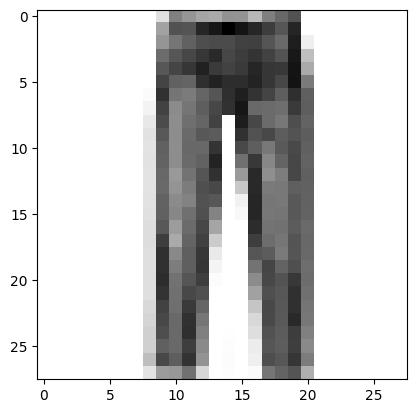

In [66]:
index = 16 #index value of any of the training images
np.set_printoptions(linewidth=320)

print(f'Label: {train_label[index]}')
print(f'Numerical Image: {train_image[index]}')

plt.imshow(train_image[index], cmap='Greys')

### Normalize the pixel values

In [67]:
train_image = train_image/255.0
test_image = test_image/255.0

### Create a callback class

In [72]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

### Create the model and compile with optimizer and loss function

In [73]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit the training data to the neural network

In [74]:
model.fit(train_image, train_label, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4914 - accuracy: 0.8249
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3669 - accuracy: 0.8662
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3669 - accuracy: 0.8662


### Evaluate the model using the test images

In [49]:
model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8713


[0.35632753372192383, 0.8712999820709229]

### Predict the and show the probability of any of the test images

In [59]:
import random

pred = model.predict(test_image)

index = random.randint(0,9999)

print(pred[index])

313/313 [==============================] - 1s 2ms/step
[2.6799139e-06 5.0758531e-10 1.7346832e-07 1.6882440e-07 1.6699826e-07 1.5903166e-06 5.1449415e-06 1.7682271e-07 9.9998981e-01 1.0367768e-08]


### Compare the predicted value with the actual value

In [60]:
print(f'Predicted Class: {np.argmax(pred[index])}', f'Actual Class: {test_label[index]}')

Predicted Class: 8 Actual Class: 8
